In [42]:
#learning fastai

import pathlib
from fastai import *
from fastai.vision import *
import pandas as pd
import re
from tqdm import tqdm_notebook as tqdm
import time
import matplotlib.pyplot as plt

In [2]:
path = pathlib.PosixPath.cwd()/'data'/'cartoons'

In [3]:
classes = []

In [4]:
# for fname in data.ls():
#     if fname.is_dir(): classes.append(fname.stem)
# len(classes)

In [7]:
# for c in done:
#     print(c)
#     verify_images(data/c, delete=True, max_size=500)

In [8]:
tfms = get_transforms(xtra_tfms=[squish(),jitter(magnitude = 0.01)])

In [9]:
src = ImageList.from_csv(path, path/'cleaned.csv')

In [10]:
src = src.split_by_rand_pct()

In [11]:
src = src.label_from_folder()

In [12]:
data64 = src.transform(tfms, size = 64).databunch().normalize(imagenet_stats)

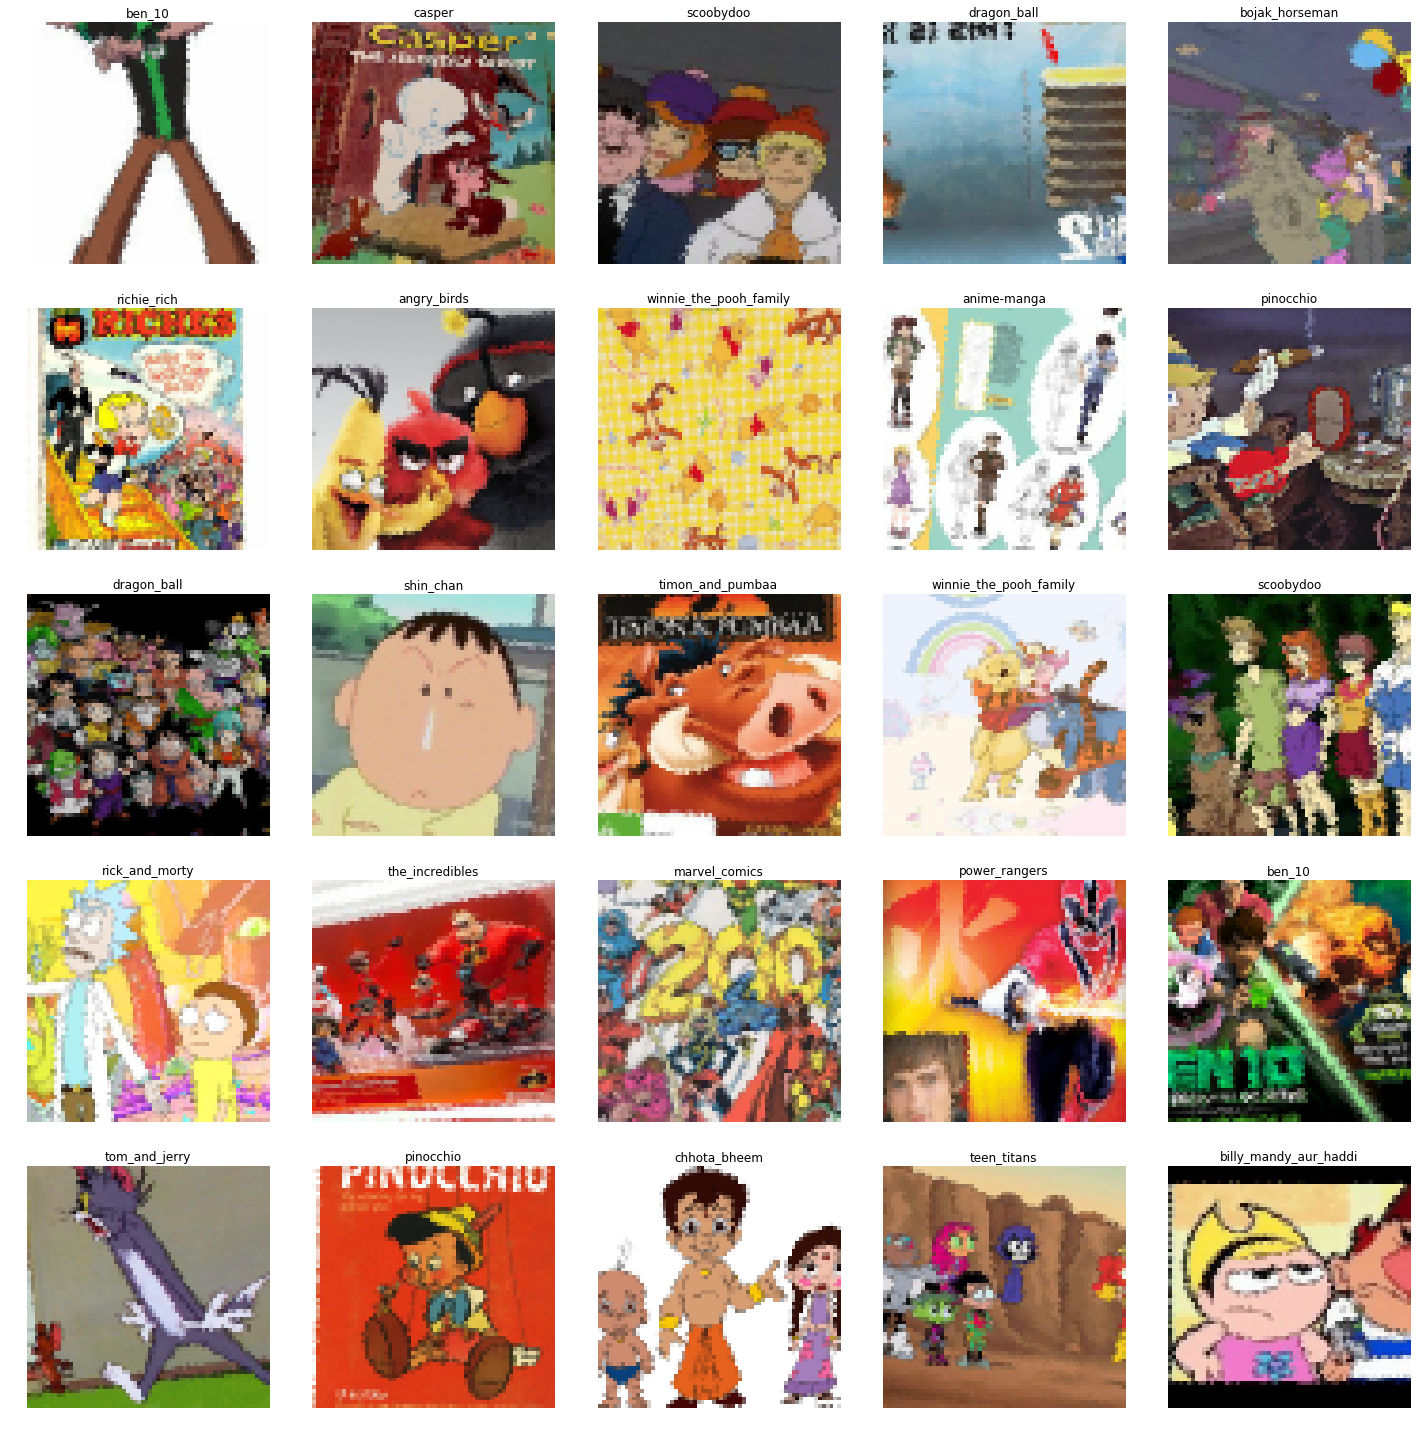

In [13]:
data64.show_batch()

In [14]:
learn = cnn_learner(data64, models.resnet50, metrics=[accuracy])

In [15]:
learn = learn.to_fp16()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


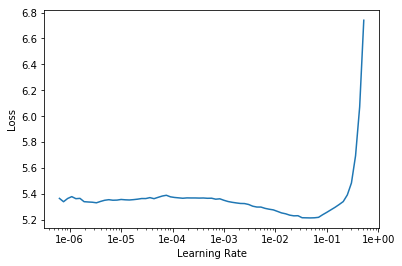

In [16]:
learn.recorder.plot()

In [17]:
lr = 0.01

In [18]:
learn.fit_one_cycle(7, slice(lr))

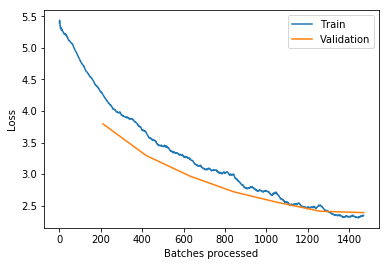

In [19]:
learn.recorder.plot_losses()

In [20]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


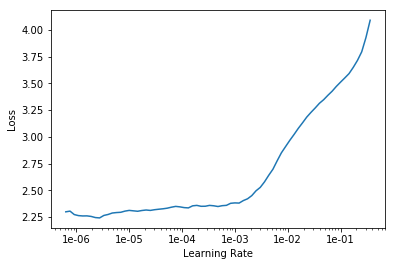

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(5, slice(lr/100, lr/5))

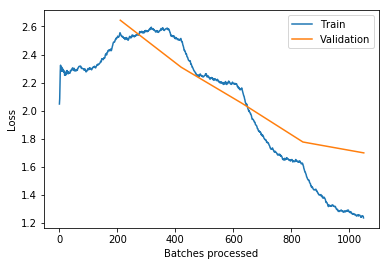

In [23]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


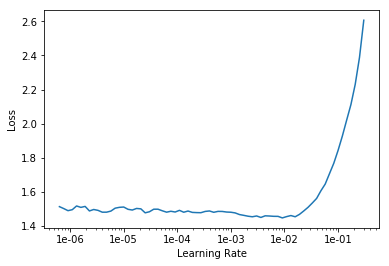

In [24]:
learn.freeze()
data96 = src.transform(tfms, size = 96).databunch().normalize(imagenet_stats)
learn.data = data96
learn = learn.to_fp16()
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(4, slice(lr))

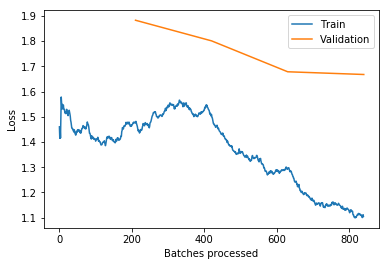

In [26]:
learn.recorder.plot_losses()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(6, slice(lr/100, lr/5))

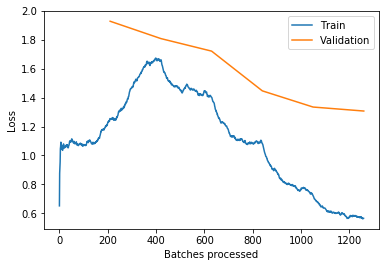

In [28]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


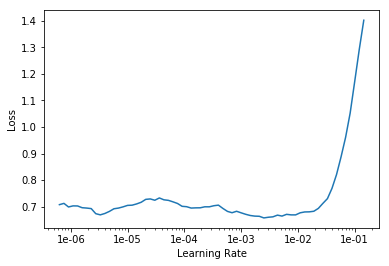

In [29]:
learn.freeze()
data128 = src.transform(tfms, size = 128).databunch().normalize(imagenet_stats)
learn.data = data128
learn = learn.to_fp16()
learn.lr_find()
learn.recorder.plot()

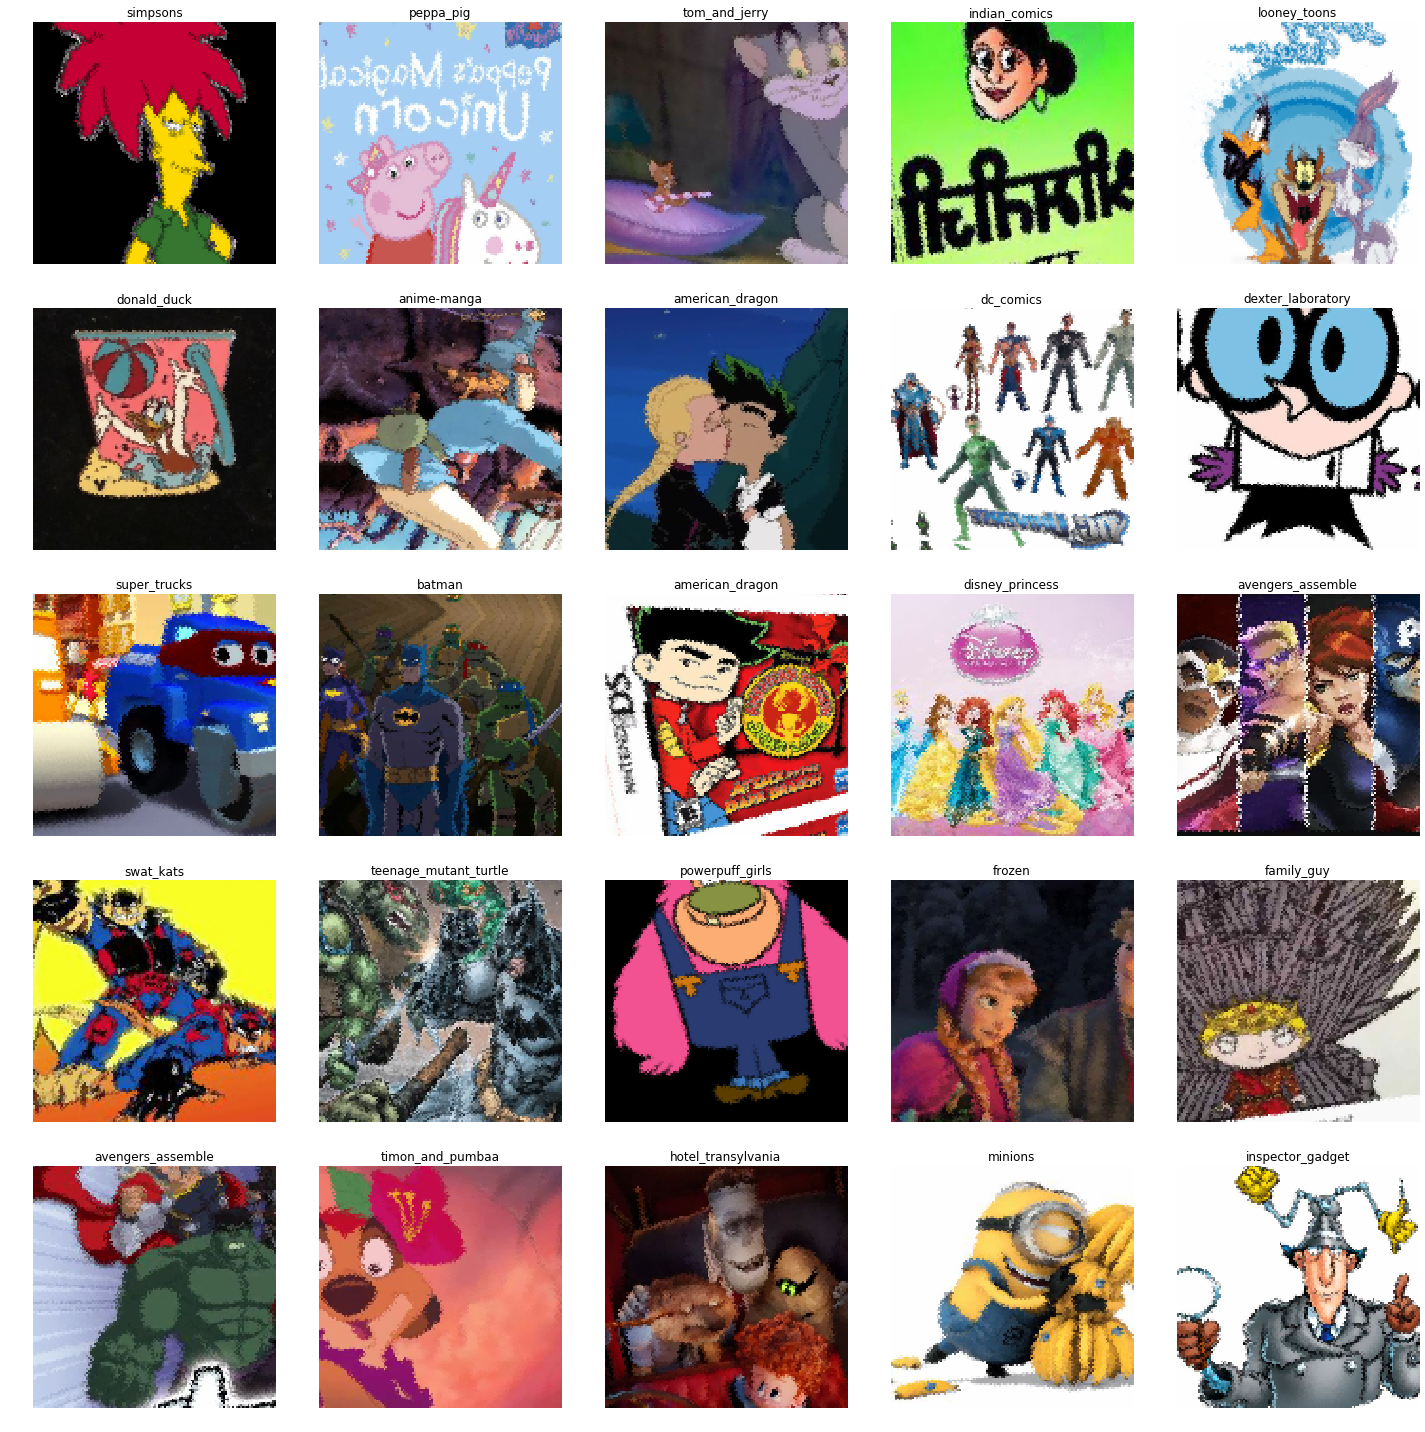

In [30]:
learn.data.show_batch()

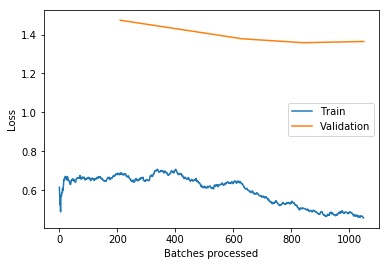

In [31]:
learn.fit_one_cycle(5, slice(lr/2))
learn.recorder.plot_losses()


In [32]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(lr/128, lr/8))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


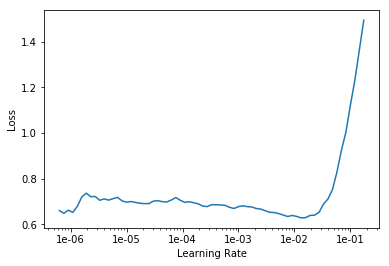

In [33]:
learn.freeze()
data224 = src.transform(tfms, size = 224).databunch().normalize(imagenet_stats)
learn.data = data224
learn = learn.to_fp16()
learn.lr_find()
learn.recorder.plot()

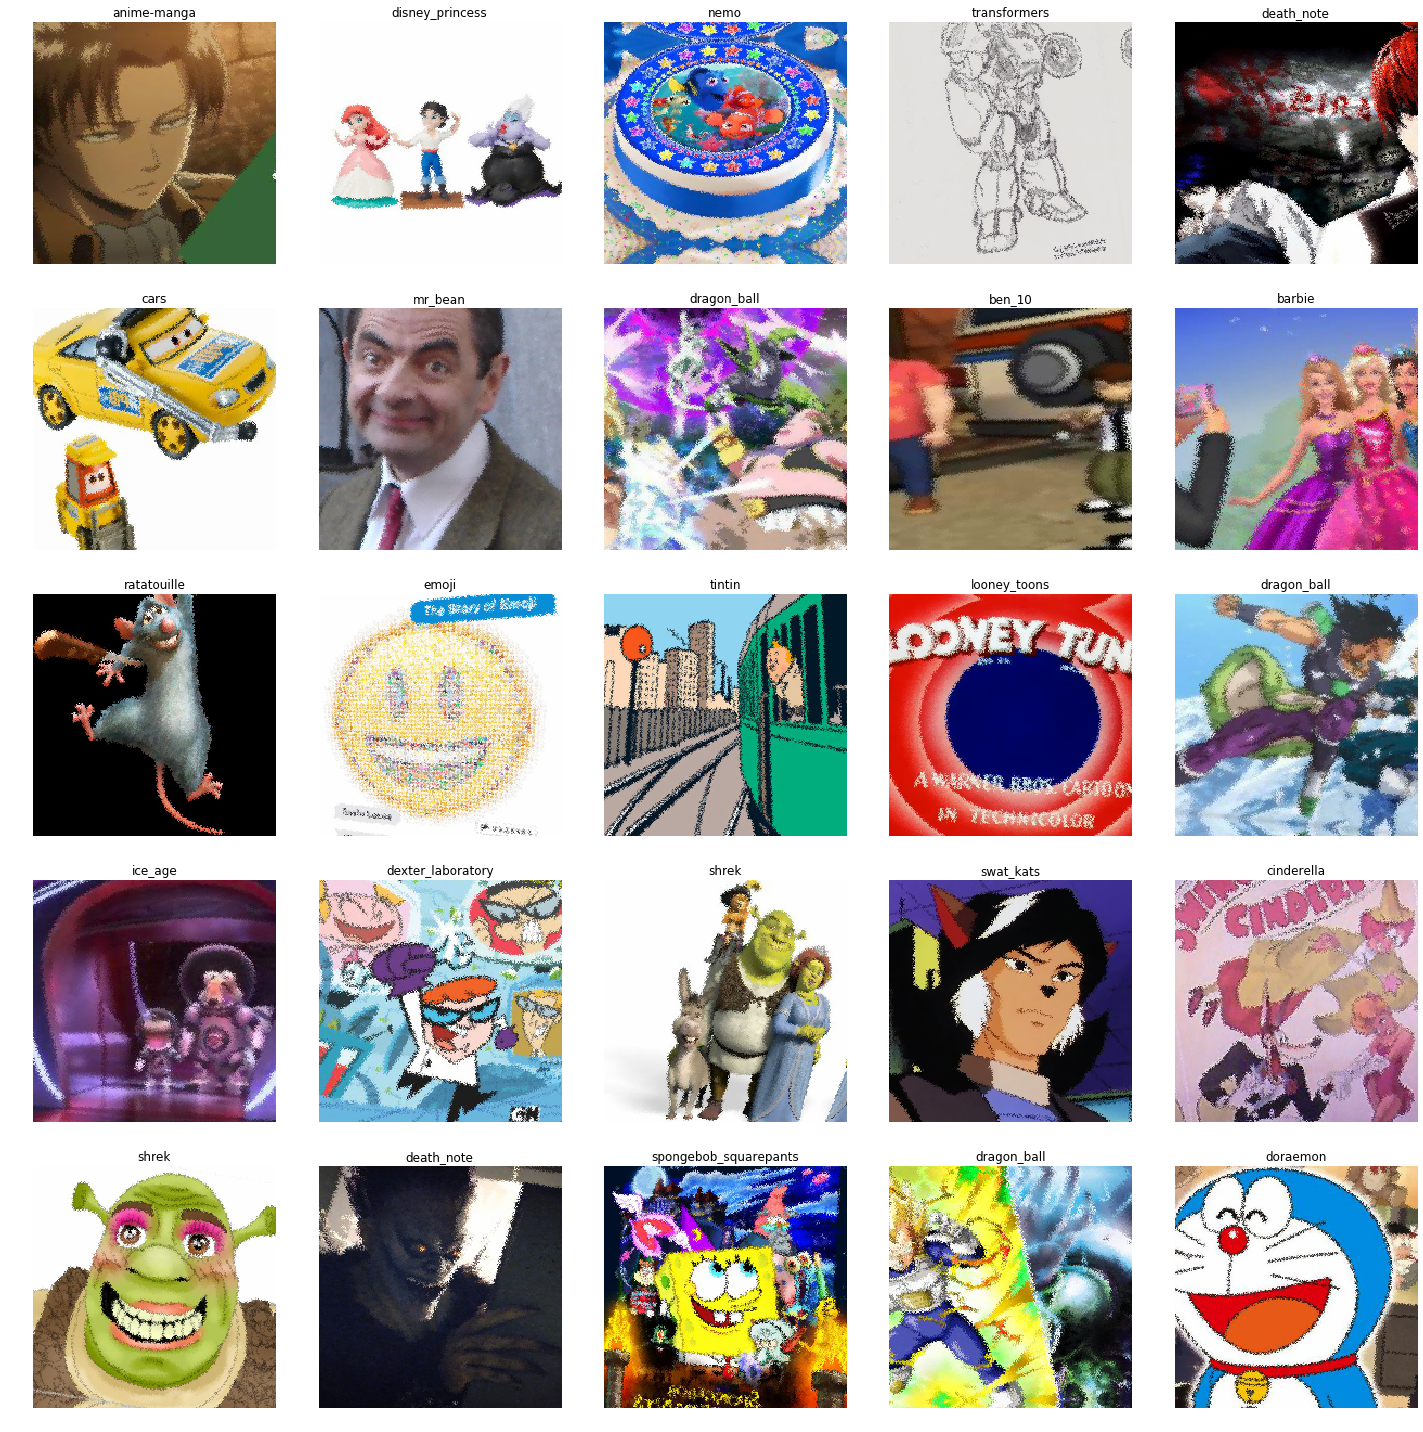

In [34]:
learn.data.show_batch()

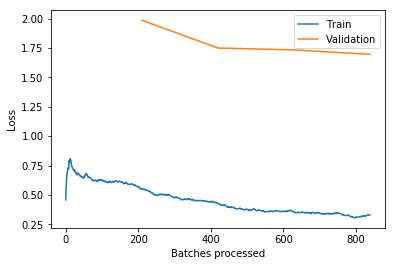

In [35]:
learn.fit_one_cycle(4, slice(lr/4))
learn.recorder.plot_losses()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(lr/150, lr/10))

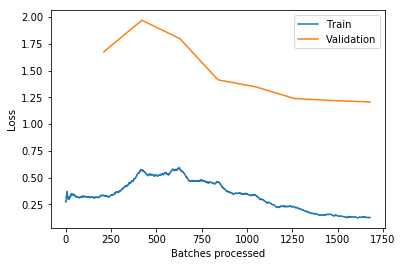

In [37]:
learn.recorder.plot_losses()

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

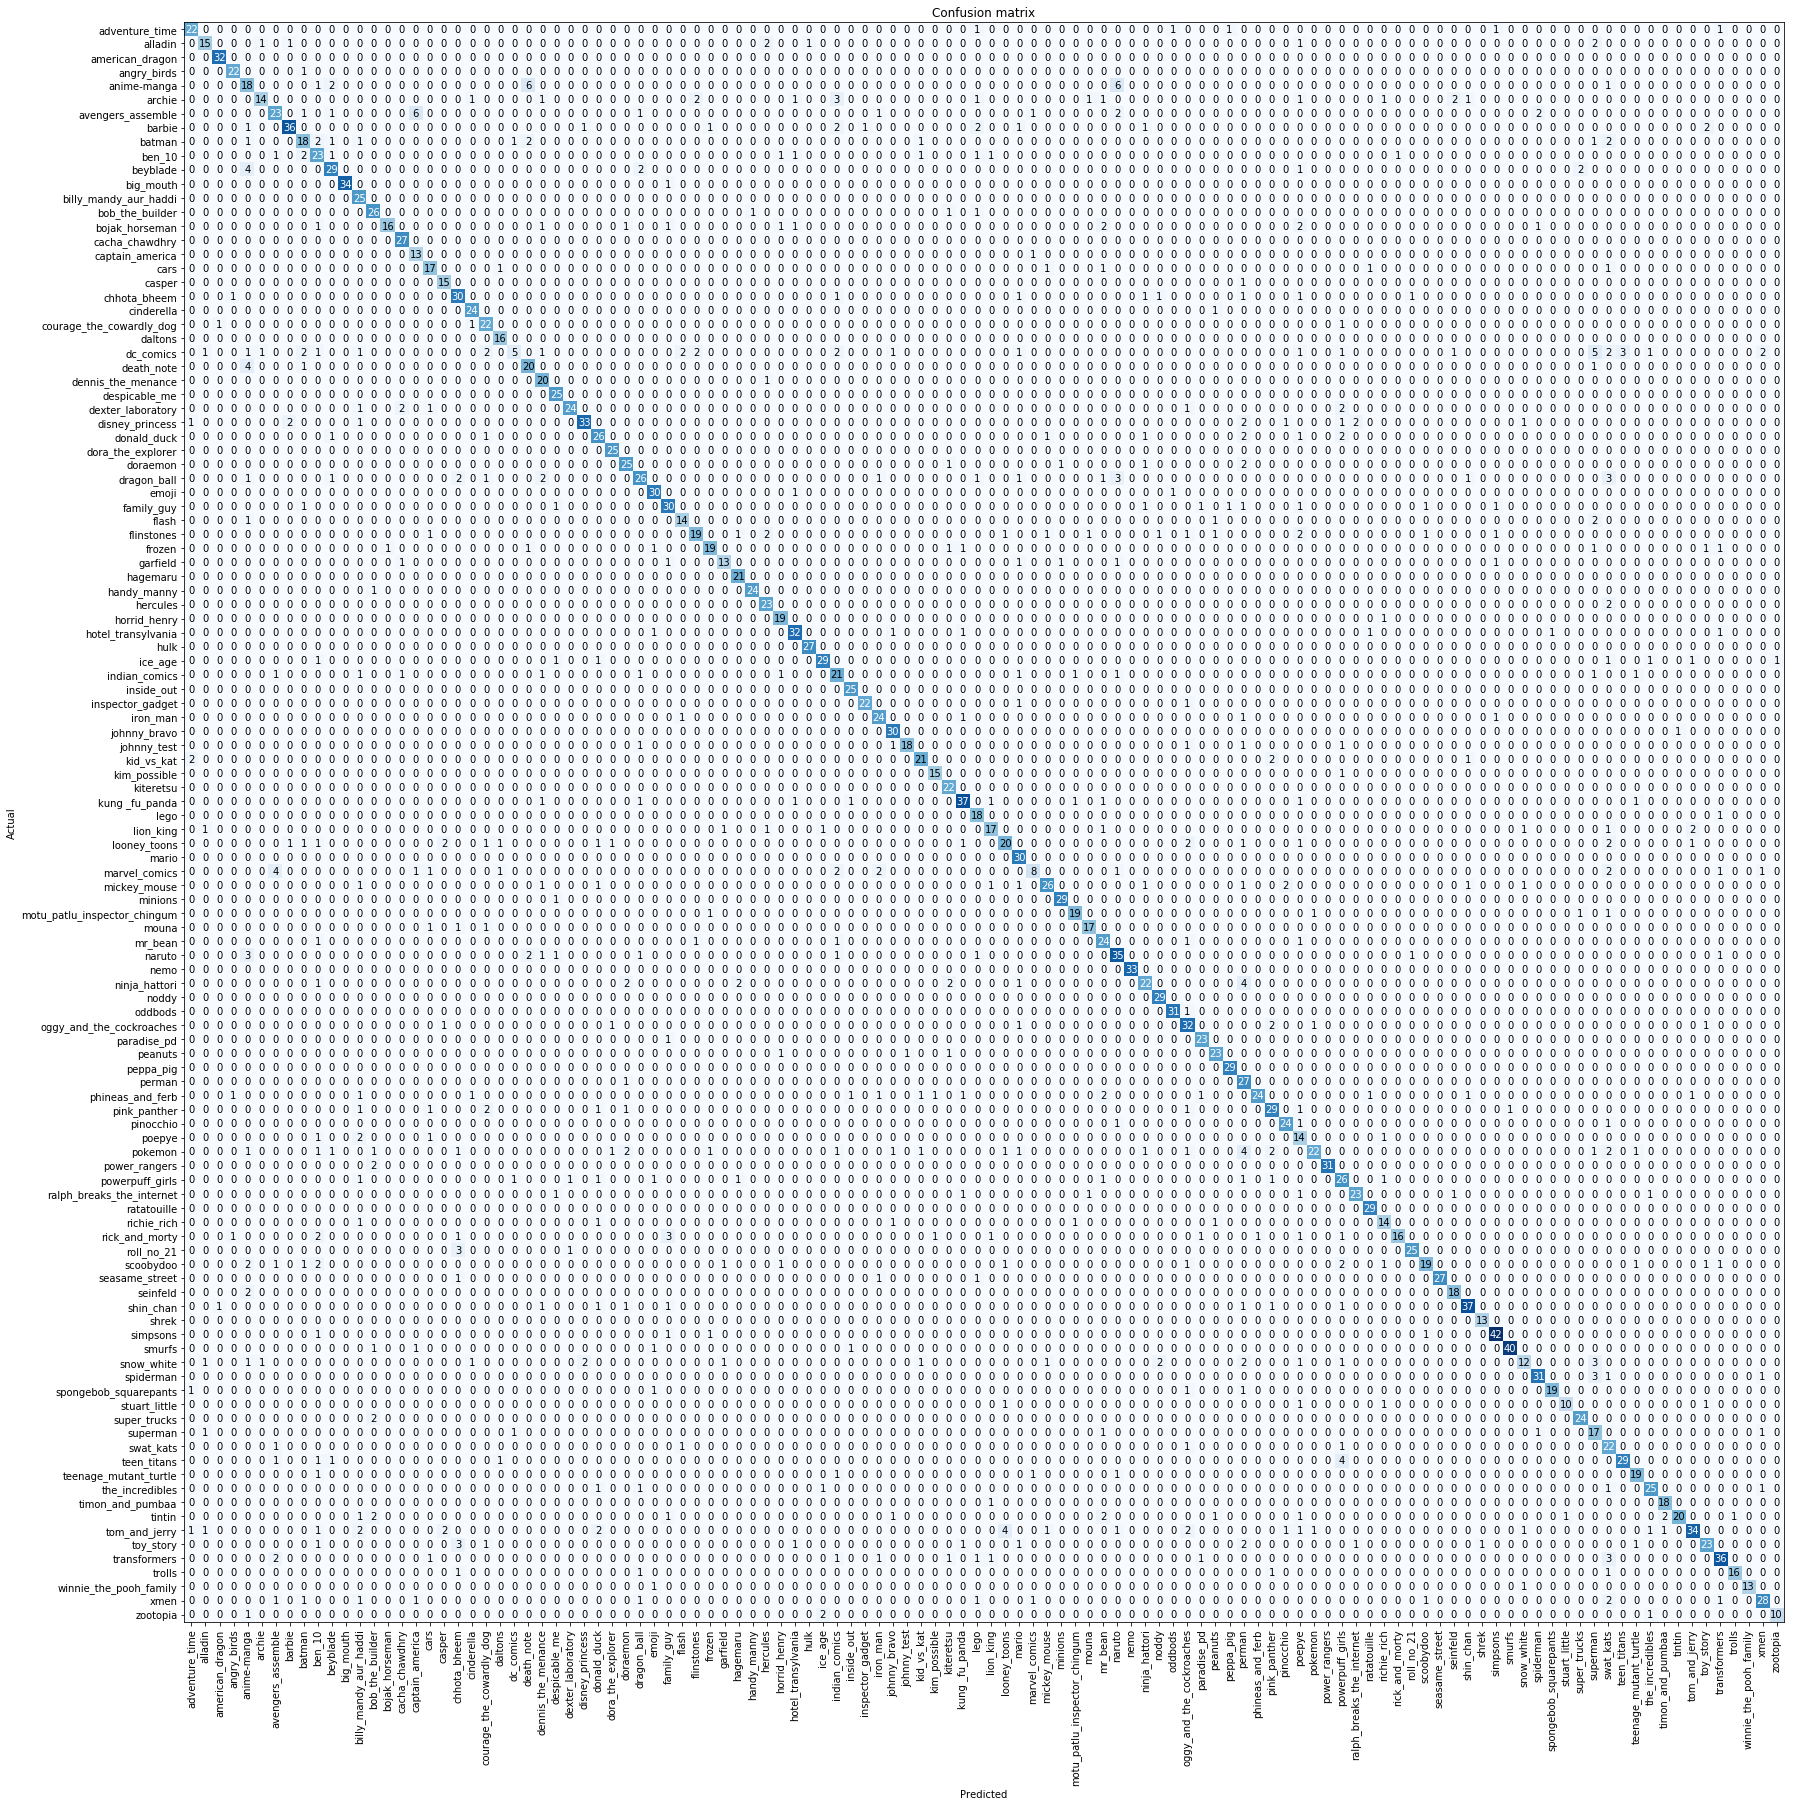

In [46]:
interp.plot_confusion_matrix(figsize=(25,25))

In [ ]:
interp.plot_top_losses(12)

In [47]:
#learn.save('rn50-224-half')

In [52]:
from fastai.widgets import *

In [53]:
db = (ImageList.from_folder(path)
      .no_split().label_from_folder()
      .transform( size = 224).databunch().normalize(imagenet_stats)
     )

/media/ahn/work/.torch/lib/python3.6/site-packages/fastai/data_block.py:171: UserWarning: `no_split` is deprecated, please use `split_none`.
  warn("`no_split` is deprecated, please use `split_none`.")


In [54]:
learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)
learn_cln = learn_cln.to_fp16()
learn_cln.load('rn50-224-half');

In [55]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [56]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [49]:
db2 = src.transform( size = 224).databunch().normalize(imagenet_stats)

In [50]:
learn.validate()

[1.1527239, tensor(0.7892)]

In [51]:
learn.export??

In [57]:
learn.export()